In [1]:
%load_ext autoreload
%autoreload 2

In [43]:
from logo import Logo
import logo_comparison
from logo_comparison import *

import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Loading the data
data_dfs = dict()

In [65]:
for i in np.arange(3, 4):

    applicant_loc = f'/Users/aaronrasin/Desktop/Logo/Logos/applicant_{i}'
    applicant_logo_names = os.listdir(applicant_loc)
    applicant_logos = list()

    previous_loc = f'/Users/aaronrasin/Desktop/Logo/Logos/previous_{i}'
    previous_logo_names = os.listdir(previous_loc)
    previous_logos = list()
    
    
    # Analyzing logo individually
    print(f"Initializing applicant logos (Test Set {i})")
    for applicant in tqdm(applicant_logo_names):
        if applicant != '.DS_Store':
            applicant_logos.append(Logo(applicant_loc + '/' + applicant))
            
    print(f"Initializing previous logos (Test Set {i})")
    for previous in tqdm(previous_logo_names):
        if previous != '.DS_Store':
            previous_logos.append(Logo(previous_loc + '/' + previous))
    
    
    # Comparing applicants and previous logos
    df = compare_logos(applicant_logos, previous_logos)
    
    data_dfs[f'df{i}'] = df

Initializing applicant logos (Test Set 3)


100%|███████████████████████████████████████████| 13/13 [00:52<00:00,  4.05s/it]


Initializing previous logos (Test Set 3)


100%|███████████████████████████████████████████| 14/14 [00:18<00:00,  1.34s/it]


Comparing logos


100%|███████████████████████████████████████████| 13/13 [00:55<00:00,  4.30s/it]


In [75]:
df1

,Applicant Logo,Previous Logo,SSIM,Color Similarity Score,Shape Complexity Score,Template Matching,Text Similarity Score
0,GiorgoArmani DunkinDonuts (fake).png,Gucci.png,0.499813,51.343171,0.000000,0.105532,0.0
1,GiorgoArmani DunkinDonuts (fake).png,Puma.png,0.304312,50.391181,0.842152,0.111955,0.0
2,GiorgoArmani DunkinDonuts (fake).png,HomeDepot.png,0.172841,36.777876,1.000000,0.107001,0.0
3,GiorgoArmani DunkinDonuts (fake).png,miumiu.png,0.600280,49.756333,0.647716,0.128266,0.0
4,GiorgoArmani DunkinDonuts (fake).png,CalvinKlein.png,0.340250,51.343171,0.032658,0.100315,0.0
...,...,...,...,...,...,...,...
754,Shell(fake).png,DunkinDonuts.png,0.447610,10.234823,0.788838,0.126931,0.0
755,Shell(fake).png,Youtube.png,0.287527,47.547000,0.720005,0.196470,0.0
756,Shell(fake).png,MarcJacobs.png,0.625598,45.094166,0.843390,0.156135,0.0
757,Shell(fake).png,PizzaHut.png,0.329507,51.009894,0.130755,0.057321,0.0


In [66]:
df3 = data_dfs['df3']
df3

,Applicant Logo,Previous Logo,SSIM,Color Similarity Score,Shape Complexity Score,Template Matching,Text Similarity Score
0,toyota(fake).png,greyhound.png,0.666611,46.279523,0.671606,0.089700,0.0
1,toyota(fake).png,AmericanAirlines.png,0.593721,26.795013,0.953279,0.062036,100.0
2,toyota(fake).png,postit.png,0.265003,45.350475,0.901085,0.082874,0.0
3,toyota(fake).png,samsung.png,0.248093,45.519935,0.963881,0.107394,100.0
4,toyota(fake).png,motorola.png,0.671249,46.279523,0.702799,0.159831,0.0
...,...,...,...,...,...,...,...
151,greyhound(fake).png,toyota.png,0.565951,40.391861,0.963641,0.086016,0.0
152,greyhound(fake).png,bmw.jpeg,0.315145,33.554948,0.961773,0.068648,0.0
153,greyhound(fake).png,nutella.png,0.505106,35.066163,0.923805,0.078720,0.0
154,greyhound(fake).png,caterpillar.png,0.577783,6.785261,0.908441,0.091825,0.0


In [69]:
features = ['SSIM', 'Color Similarity Score', 'Template Matching']
app_groups = df3['Applicant Logo'].unique()
prev_groups = df3['Previous Logo'].unique()

# Scale applicant scores
app_subs = dict()
prev_subs = dict()

for app_group in app_groups:
    sub = df3[df3['Applicant Logo'] == app_group]

    for feature in features:
        scaler = MinMaxScaler()
        sub[f'Applicant Scaled {feature}'] = scaler.fit_transform(sub[feature].values.reshape(-1,1))
    
    app_subs[app_group] = sub


for prev_group in prev_groups:
    sub = df3[df3['Previous Logo'] == prev_group]

    for feature in features:
        scaler = MinMaxScaler()
        sub[f'Previous Scaled {feature}'] = scaler.fit_transform(sub[feature].values.reshape(-1,1))
        
    prev_subs[prev_group] = sub

In [70]:
app_scaled_df = pd.concat(list(app_subs.values()))
prev_scaled_df = pd.concat(list(prev_subs.values()))

In [71]:
scaled_df = app_scaled_df.merge(prev_scaled_df, left_on = ['Applicant Logo', 'Previous Logo'], right_on = ['Applicant Logo', 'Previous Logo'])

In [72]:
final_df = pd.DataFrame({
    'Applicant Logo': scaled_df['Applicant Logo'],
    'Previous Logo': scaled_df['Previous Logo'],
    'SSIM': (scaled_df['Applicant Scaled SSIM'] + scaled_df['Previous Scaled SSIM'])/2,
    'Color Similarity Score': (scaled_df['Applicant Scaled Color Similarity Score'] + scaled_df['Previous Scaled Color Similarity Score'])/2,
    'Shape Complexity Score': scaled_df['Shape Complexity Score_x'],
    'Template Matching': (scaled_df['Applicant Scaled Template Matching'] + scaled_df['Previous Scaled Template Matching'])/2,
    'Text Similarity Score': scaled_df['Text Similarity Score_x']
})

In [73]:
final_df

,Applicant Logo,Previous Logo,SSIM,Color Similarity Score,Shape Complexity Score,Template Matching,Text Similarity Score
0,toyota(fake).png,greyhound.png,0.888860,1.000000,0.671606,0.536591,0.0
1,toyota(fake).png,AmericanAirlines.png,0.748079,0.654234,0.953279,0.245537,100.0
2,toyota(fake).png,postit.png,0.285947,0.988865,0.901085,0.568028,0.0
3,toyota(fake).png,samsung.png,0.188238,0.990896,0.963881,0.714169,100.0
4,toyota(fake).png,motorola.png,0.829177,1.000000,0.702799,1.000000,0.0
...,...,...,...,...,...,...,...
151,greyhound(fake).png,toyota.png,0.571340,0.918319,0.963641,0.614528,0.0
152,greyhound(fake).png,bmw.jpeg,0.390080,0.591715,0.961773,0.497795,0.0
153,greyhound(fake).png,nutella.png,0.461967,0.802208,0.923805,0.435936,0.0
154,greyhound(fake).png,caterpillar.png,0.580950,0.063613,0.908441,0.602383,0.0


In [74]:
final_df.to_excel('/Users/aaronrasin/Desktop/Logo/LogoComparisonData.xlsx', index=False)

In [ ]:
df1[df1['Applicant Logo' == 'GiorgoArmani DunkinDonuts (fake).png']]

In [11]:
df1

,Applicant Logo,Previous Logo,SSIM,Color Similarity Score,Shape Complexity Score,Template Matching,Text Similarity Score
0,GiorgoArmani DunkinDonuts (fake).png,Gucci.png,0.499813,51.258226,0.000000,0.105532,0.0
1,GiorgoArmani DunkinDonuts (fake).png,Puma.png,0.304312,50.306802,0.842152,0.111955,0.0
2,GiorgoArmani DunkinDonuts (fake).png,HomeDepot.png,0.172841,36.565240,1.000000,0.107001,0.0
3,GiorgoArmani DunkinDonuts (fake).png,miumiu.png,0.600280,49.672382,0.647716,0.128266,0.0
4,GiorgoArmani DunkinDonuts (fake).png,CalvinKlein.png,0.340250,51.258226,0.032658,0.100315,0.0
...,...,...,...,...,...,...,...
777,Shell(fake).png,DunkinDonuts.png,0.447610,30.764535,0.788838,0.126931,0.0
778,Shell(fake).png,Youtube.png,0.287527,50.378172,0.720005,0.196470,0.0
779,Shell(fake).png,MarcJacobs.png,0.625598,44.600591,0.843390,0.156135,0.0
780,Shell(fake).png,PizzaHut.png,0.329507,53.305379,0.130755,0.057321,0.0


In [60]:
df1 = list(data_dfs.values())[1]

prev_color = df1[['Previous Logo', 'Color Similarity Score']]
appl_color = df1[['Applicant Logo', 'Color Similarity Score']]
thing = (appl_color.groupby('Applicant Logo')
         .max()
         .reset_index()
         .merge(prev_color)
         .drop_duplicates()
         .iloc[:50])

thing.sort_values('Color Similarity Score', ascending=False)


,Applicant Logo,Color Similarity Score,Previous Logo
18,Nike(woman).png,80.233323,Visa.png
3,DHL YSL (fake).png,79.495635,Gucci.png
4,DHL YSL (fake).png,79.495635,CalvinKlein.png
5,DHL YSL (fake).png,79.495635,Versace.png
25,ebay chloe (fake).png,70.825932,PizzaHut.png
20,PizzaHut MarcJacobs (fake).png,65.643813,shell.png
1,BurgerKing CalvinKlein (fake).png,65.529231,shell.png
19,Pepsi Palace (fake).png,65.068888,shell.png
9,HomeDepot (fake).png,64.854484,Visa.png
10,Ikea Miumiu (fake).png,58.545819,Pepsi.png


In [238]:
dd_colors = applicant_logos[29].color_detect()

In [239]:
dd_colors

{(164, 116, 113): 0.1734857497543061,
 (214, 3, 111): 0.40454145761133814,
 (240, 110, 27): 0.4219727926343558}

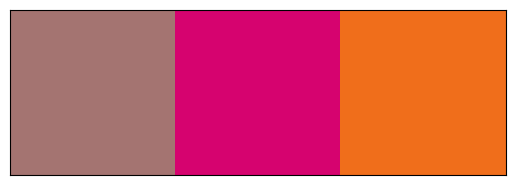

In [240]:
plt.imshow([list(dd_colors.keys())])
plt.xticks([]), plt.yticks([])
plt.show()

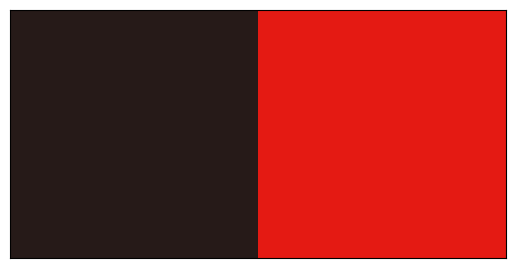

In [39]:
bridgestone = applicant_logos[0]
bridgestone.color_detect(include_white=True)
bridgestone.show_colors()

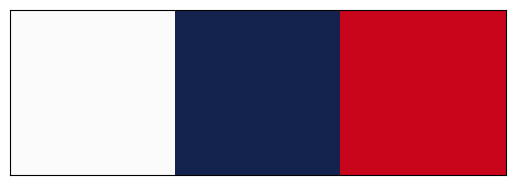

In [45]:
previous_logos[4].colors = previous_logos[4].color_detect(include_white=True)
# previous_logos[4].show_colors()


GiorgoArmani DunkinDonuts (fake).png {(229, 143, 81): 0.16572077185017026, (237, 74, 151): 0.27063401978271445, (221, 95, 155): 0.13507377979568672, (245, 130, 57): 0.2677152586346684, (244, 188, 180): 0.16085616993676016}


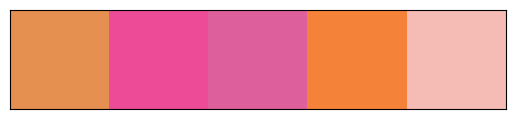

Visa Versace (fake).png {(154, 186, 208): 0.21925566343042072, (19, 91, 148): 0.7807443365695793}


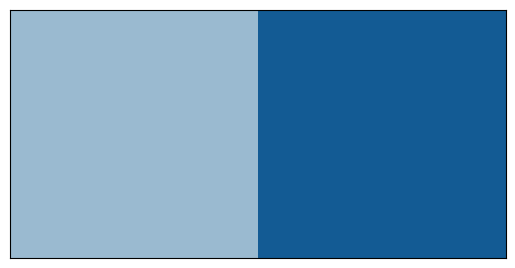

McDonalds (fake).png {(203, 35, 42): 0.798810548556225, (243, 186, 98): 0.20118945144377495}


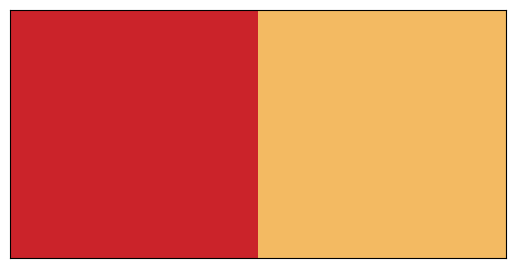

ebay chloe (fake).png {(210, 69, 67): 0.25145317545748114, (189, 193, 88): 0.5784714747039827, (37, 106, 164): 0.17007534983853606}


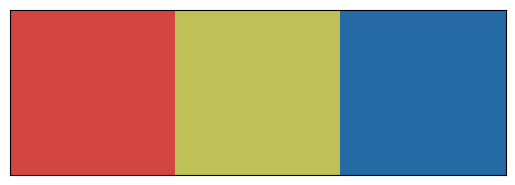

Nike Dior (fake).png {(6, 6, 6): 0.8262992125984252, (160, 160, 160): 0.1737007874015748}


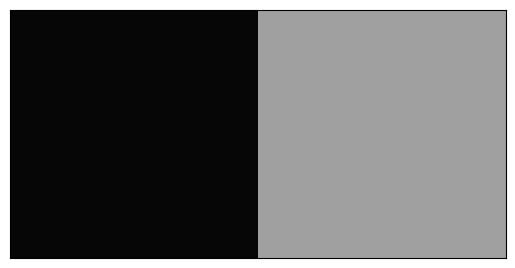

McDonalds Stussy (fake).png {(192, 51, 48): 0.6540499281609196, (252, 246, 245): 0.18498563218390804, (241, 164, 76): 0.1609644396551724}


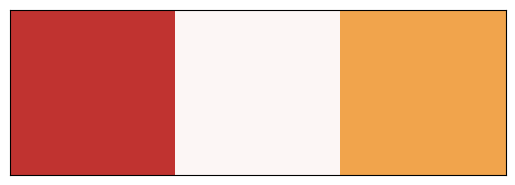

Nike(jedi).png {(52, 43, 41): 0.833568177291204, (181, 182, 113): 0.16643182270879595}


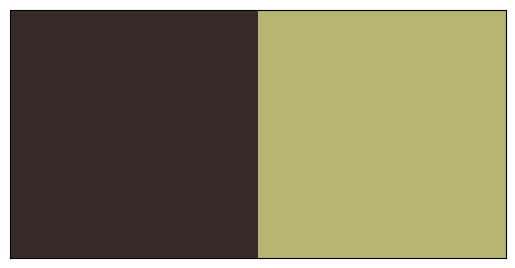

BaskinRobins DonnaKaran (fake).png {(179, 205, 231): 0.2193211488250653, (32, 110, 171): 0.204177545691906, (209, 112, 159): 0.15195822454308094, (113, 157, 193): 0.15221932114882505, (27, 96, 149): 0.2723237597911227}


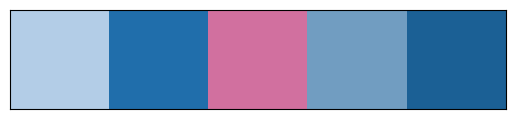

Lego(fake).png {(211, 77, 43): 0.8574582150741091, (30, 26, 24): 0.1425417849258909}


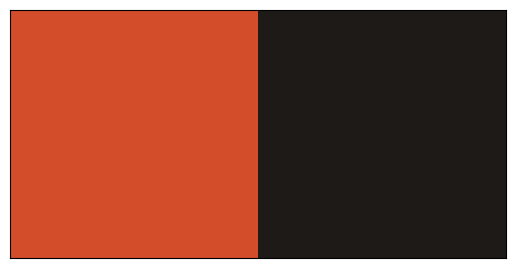

Nike(fried).png {(8, 8, 8): 0.7873895080118185, (158, 157, 157): 0.2126104919881815}


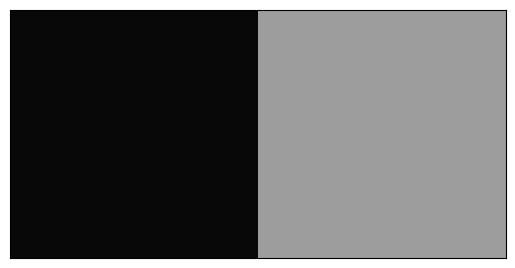

PizzaHut MarcJacobs (fake).png {(12, 9, 9): 0.5836143374547271, (177, 174, 152): 0.19183214687148745, (209, 47, 51): 0.22455351567378543}


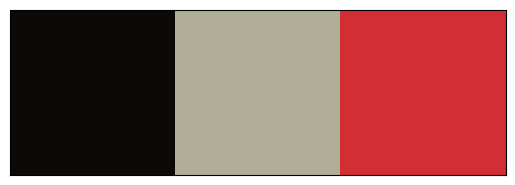

TomFord Youtube (fake).png {(214, 52, 50): 0.6509819171689676, (216, 168, 167): 0.1677036748979195, (10, 10, 10): 0.18131440793311296}


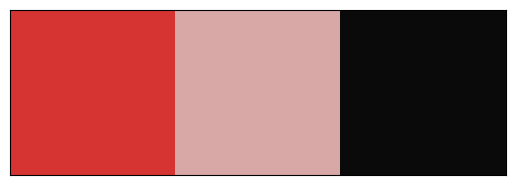

Nike(woman).png {(241, 217, 155): 0.4393239153086612, (21, 17, 12): 0.18927606909701794, (229, 196, 110): 0.37140001559432084}


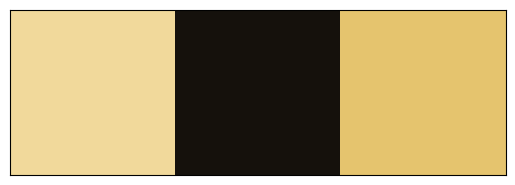

DHL YSL (fake).png {(253, 199, 54): 0.881429045459573, (210, 39, 42): 0.11857095454042695}


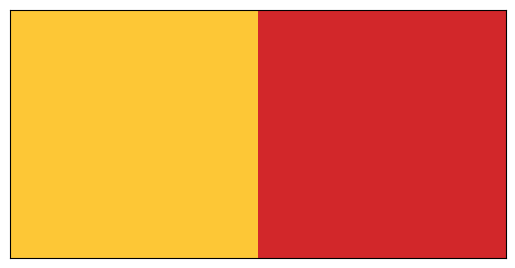

Ikea Miumiu (fake).png {(35, 102, 137): 0.35795454545454547, (240, 230, 74): 0.4359549441786284, (239, 247, 249): 0.20609051036682616}


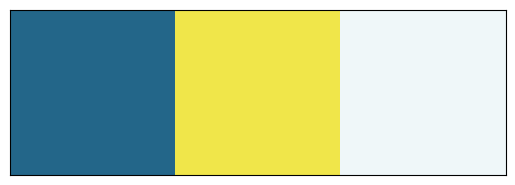

BurgerKing CalvinKlein (fake).png {(33, 84, 157): 0.2433852140077821, (226, 39, 48): 0.3916731517509728, (244, 194, 100): 0.36494163424124515}


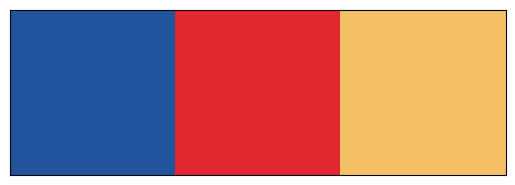

Pepsi Palace (fake).png {(234, 33, 44): 0.5801651470841218, (65, 114, 164): 0.4198348529158782}


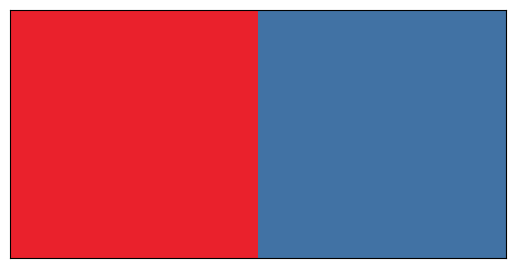

LG (fake).png {(148, 134, 147): 0.395440414507772, (198, 38, 87): 0.604559585492228}


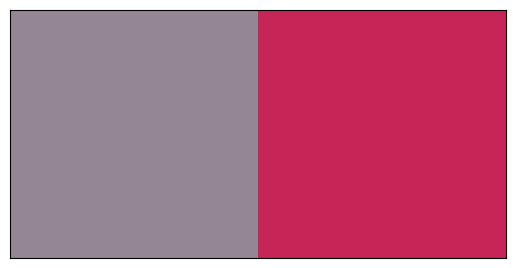

HomeDepot (fake).png {(243, 134, 40): 0.8739602191378841, (245, 202, 149): 0.1260397808621159}


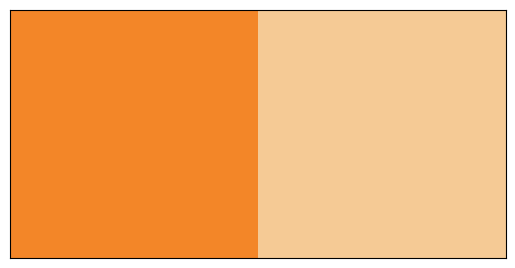

tokyo2020 (fake).png {(180, 171, 152): 0.37394685677252104, (81, 43, 45): 0.626053143227479}


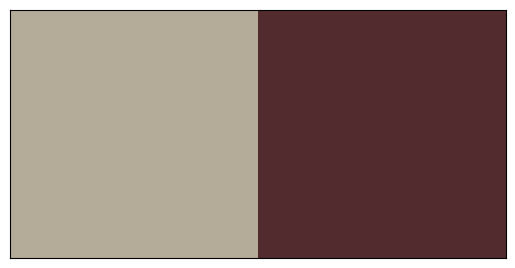

Chanel Champion (fake).png {(57, 27, 99): 0.7676169983862292, (164, 166, 198): 0.23238300161377085}


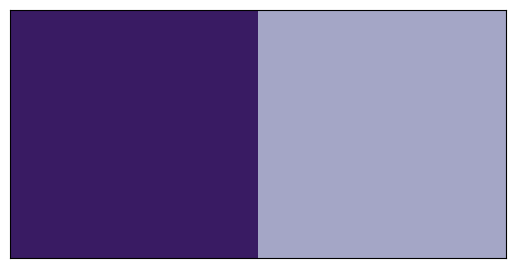

Puma Gucci (fake).png {(12, 12, 12): 0.7692, (168, 168, 168): 0.2308}


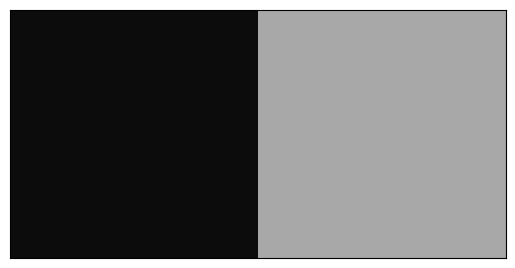

Shell(fake).png {(244, 11, 5): 0.5221535029909764, (246, 205, 42): 0.4778464970090236}


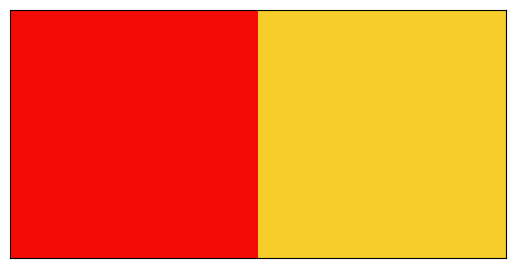

In [31]:
for logo in applicant_logos:
    print(logo.name, logo.colors)
    logo.show_colors()

Gucci.png {(0, 0, 0): 0.0, (255, 255, 255): 0.79364013671875}


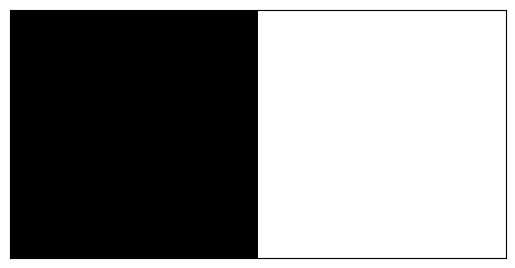

Puma.png {(2, 2, 2): 0.8970552046591748, (73, 73, 73): 0.1029447953408252}


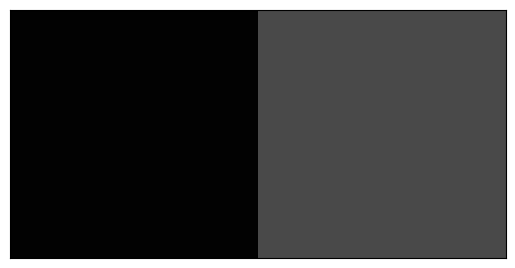

HomeDepot.png {(249, 98, 4): 0.9289129969309828, (242, 163, 111): 0.0710870030690172}


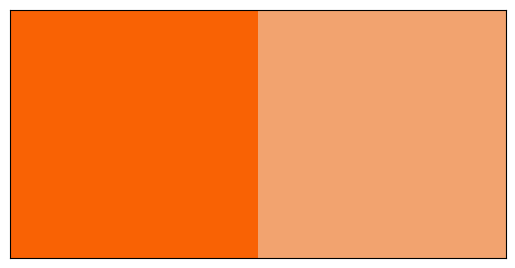

miumiu.png {(171, 169, 168): 0.18202374222724704, (8, 8, 8): 0.817976257772753}


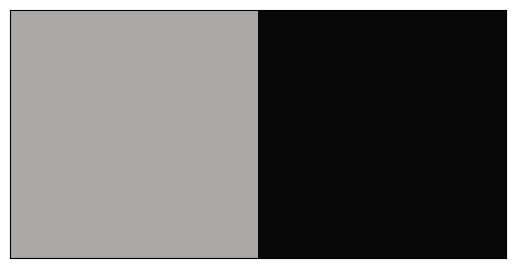

CalvinKlein.png {(255, 255, 255): 0.0, (0, 0, 0): 0.24638671875}


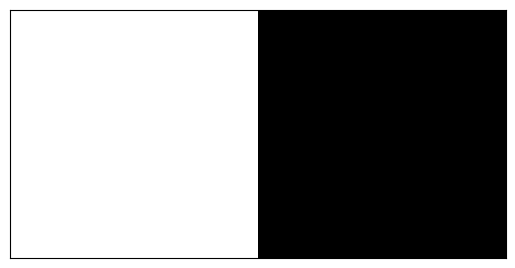

BaskinRobbins.png {(218, 99, 161): 0.47505841714924313, (12, 96, 165): 0.3547698872295032, (185, 187, 210): 0.17017169562125367}


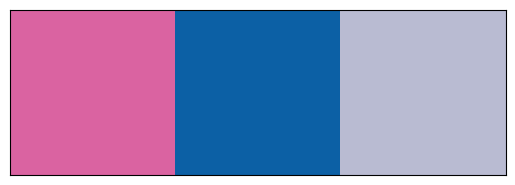

BurgerKing.png {(246, 182, 104): 0.35785829108445655, (235, 29, 34): 0.40459997526895014, (18, 102, 173): 0.2375417336465933}


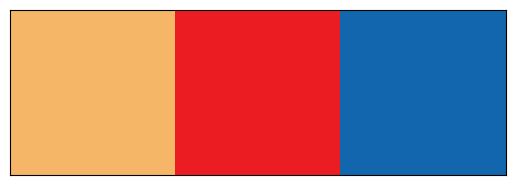

LG.png {(135, 124, 128): 0.257396449704142, (165, 23, 81): 0.5187376725838264, (230, 171, 198): 0.22386587771203156}


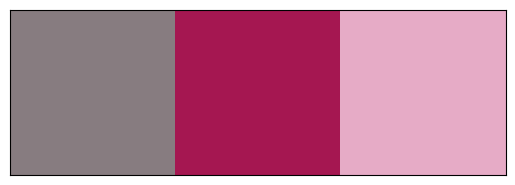

theatre.png {(27, 24, 28): 0.8041431261770244, (175, 175, 175): 0.1958568738229755}


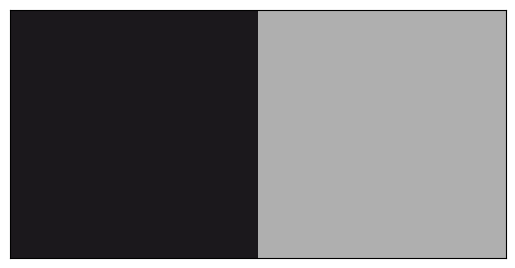

shell.png {(253, 251, 250): 0.2736922554347826, (250, 150, 14): 0.6422809103260869, (216, 47, 14): 0.08402683423913043}


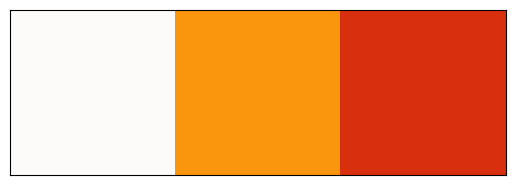

Chanel.png {(21, 21, 20): 0.775709219858156, (170, 169, 169): 0.22429078014184398}


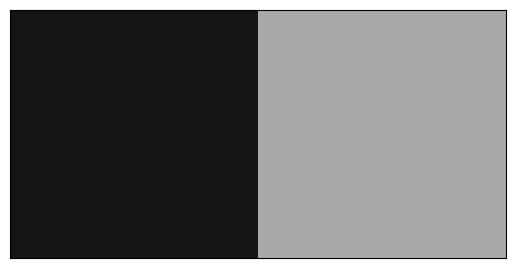

lego.png {(250, 2, 0): 0.7738885440045843, (101, 86, 27): 0.22611145599541568}


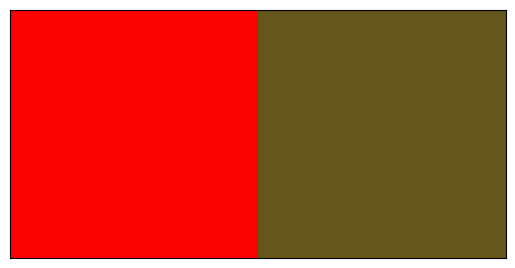

Nike.png {(26, 26, 26): 0.05604440232841478, (0, 0, 0): 0.9439555976715852}


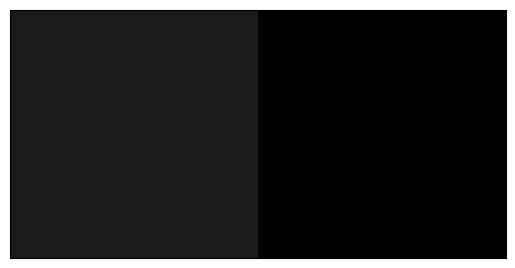

GiorgioArmani.jpeg {(99, 99, 99): 0.23342541436464087, (16, 16, 16): 0.4233425414364641, (195, 195, 195): 0.343232044198895}


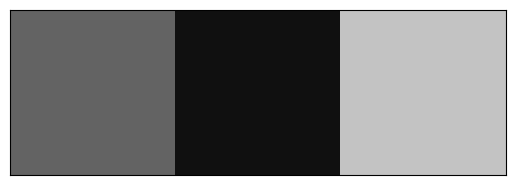

Visa.png {(26, 42, 116): 0.8491204330175913, (177, 181, 198): 0.15087956698240865}


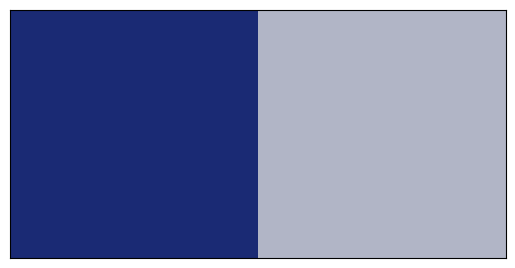

Stussy.png {(30, 29, 30): 0.7666483214089158, (109, 109, 109): 0.23335167859108422}


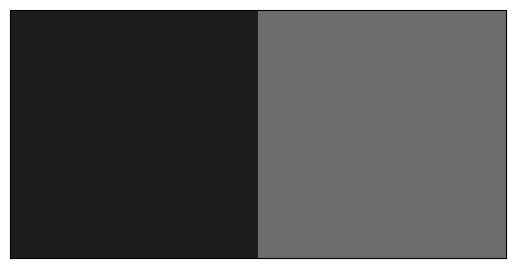

TomFord.jpeg {(7, 7, 7): 0.7869362363919129, (142, 142, 142): 0.2130637636080871}


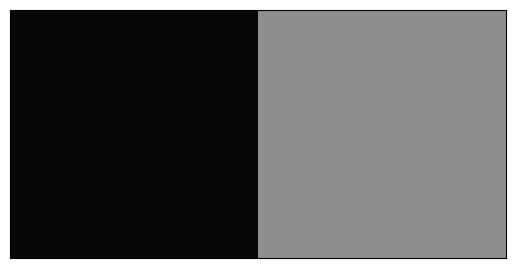

Pepsi.png {(14, 84, 162): 0.28991913377192985, (255, 23, 33): 0.3901452850877193, (253, 253, 254): 0.31993558114035087}


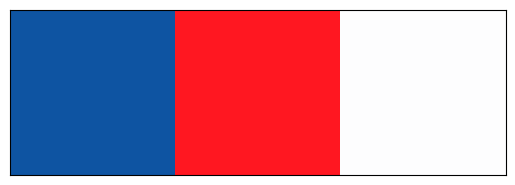

HarleyDavidson.png {(250, 250, 250): 0.45186237373737376, (20, 11, 5): 0.3379892676767677, (213, 98, 22): 0.2101483585858586}


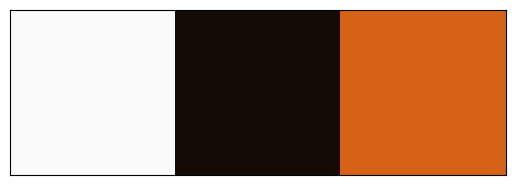

Ikea.png {(2, 62, 149): 0.0433349609375, (234, 234, 235): 0.3359375, (239, 201, 49): 0.17291259765625, (252, 252, 252): 0.3310546875, (43, 83, 148): 0.11676025390625}


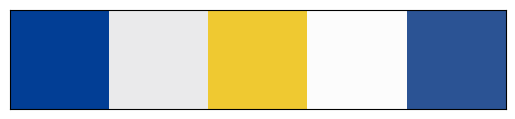

Lowe's.png {(2, 73, 143): 0.939203354297694, (148, 178, 208): 0.06079664570230608}


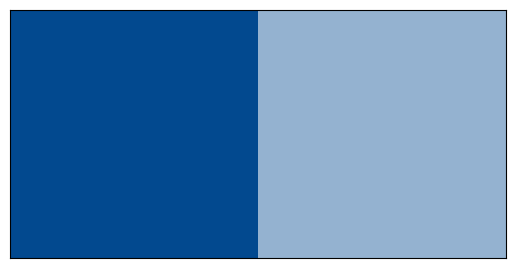

Dior.png {(10, 10, 10): 0.7732092061029222, (164, 164, 164): 0.22679079389707785}


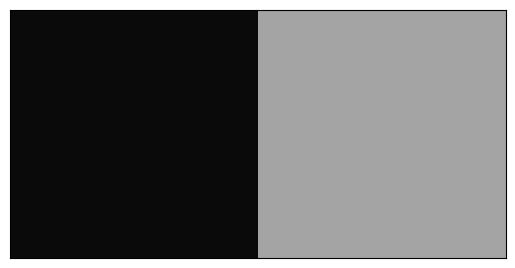

Versace.png {(0, 0, 0): 0.0, (255, 255, 255): 0.7590361445783133}


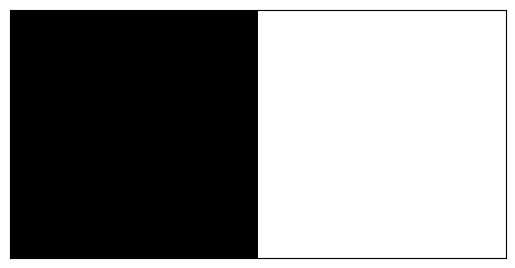

ebay.png {(133, 184, 21): 0.20535041446872646, (1, 99, 210): 0.28183873398643555, (232, 47, 52): 0.24642049736247174, (247, 179, 2): 0.2513187641296157, (30, 0, 0): 0.015071590052750565}


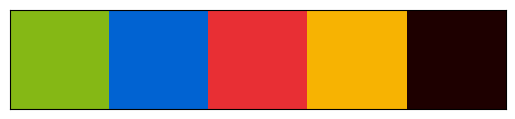

Palace.png {(164, 164, 164): 0.1019542298791463, (8, 8, 8): 0.8980457701208537}


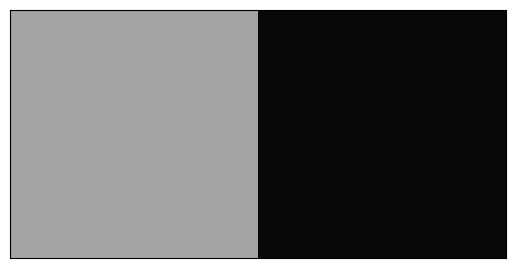

DHL.png {(254, 202, 0): 0.8893173758865248, (216, 14, 18): 0.11068262411347518}


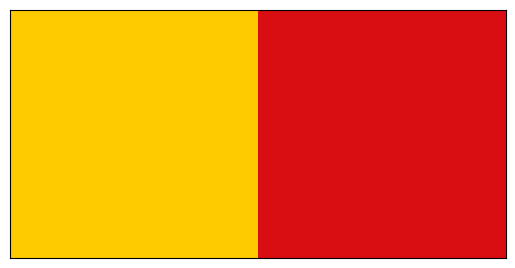

Champion.png {(45, 42, 98): 0.9701057236602261, (0, 0, 2): 0.02989427633977397}


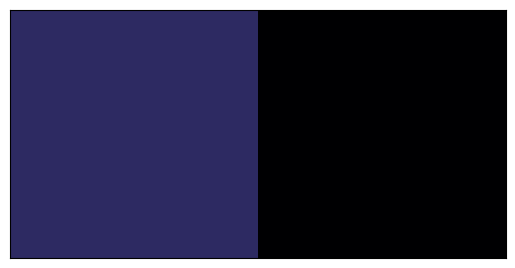

DonnaKaran.png {(32, 32, 32): 0.28789279112754157, (3, 3, 3): 0.7121072088724584}


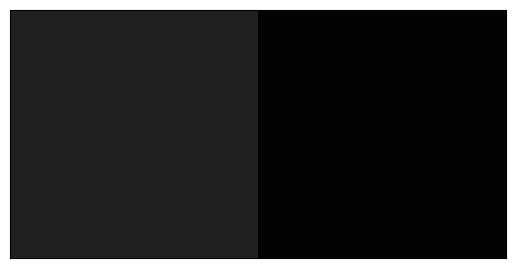

DunkinDonuts.png {(253, 250, 250): 0.5914107921511628, (226, 60, 71): 0.3748410247093023, (85, 39, 26): 0.033748183139534885}


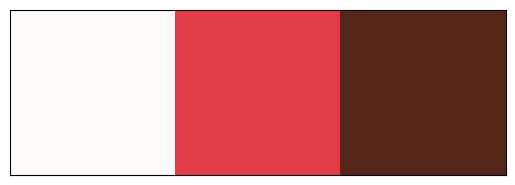

Youtube.png {(230, 230, 230): 0.3010373073642873, (254, 0, 0): 0.19238779031714234, (36, 36, 36): 0.18407743112715444, (253, 253, 253): 0.30956583827525336, (169, 144, 144): 0.012931632916162557}


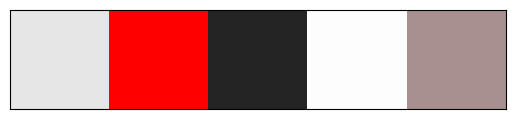

MarcJacobs.png {(0, 0, 0): 0.2507836990595611, (39, 32, 34): 0.7492163009404389}


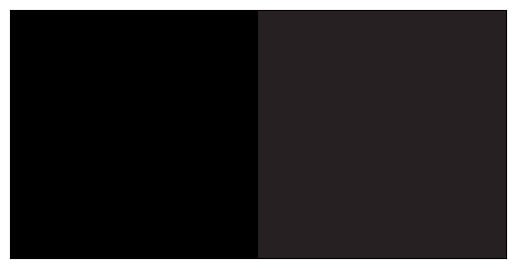

PizzaHut.png {(58, 5, 6): 0.8906473351031243, (176, 173, 120): 0.10935266489687563}


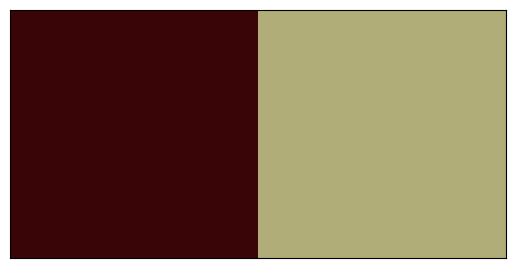

McDonald's.png {(188, 1, 21): 0.92083740234375, (248, 213, 84): 0.07916259765625}


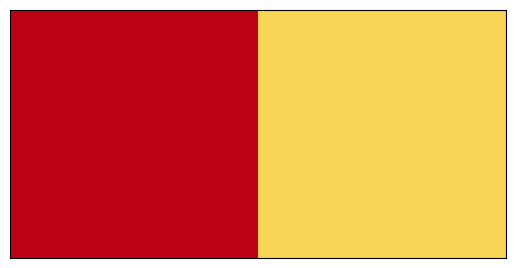

YvesSaintLaurent.png {(0, 0, 0): 0.20540364583333334, (255, 255, 255): 0.0}


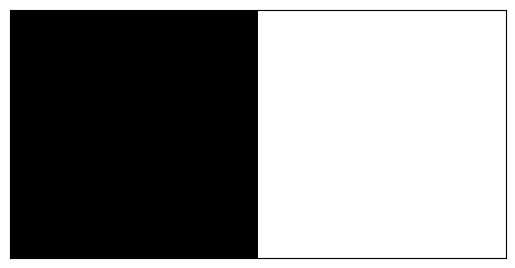

GiorgoArmani DunkinDonuts (fake).png {(229, 143, 81): 0.16572077185017026, (237, 74, 151): 0.27063401978271445, (221, 95, 155): 0.13507377979568672, (245, 130, 57): 0.2677152586346684, (244, 188, 180): 0.16085616993676016}


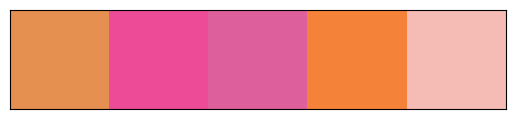

In [32]:
for logo in previous_logos:
    print(logo.name, logo.colors)
    logo.show_colors()

In [20]:
previous_logos[29].colors = previous_logos[29].color_detect(include_white=True)
previous_logos[29].colors

{(253, 250, 250): 0.5925690406976745, (215, 58, 67): 0.4074309593023256}

In [68]:
previous_logos[7].colors = previous_logos[7].color_detect(include_white=False)
previous_logos[7].colors

{(12, 98, 172): 0.22492889823172993,
 (235, 41, 47): 0.2975145294917769,
 (221, 188, 187): 0.12056386793619389,
 (253, 178, 68): 0.24619760108816618,
 (234, 0, 2): 0.11079510325213306}

Gucci.png


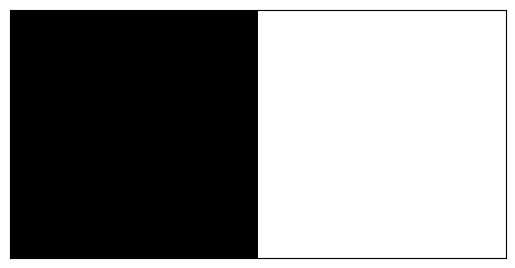

Puma.png


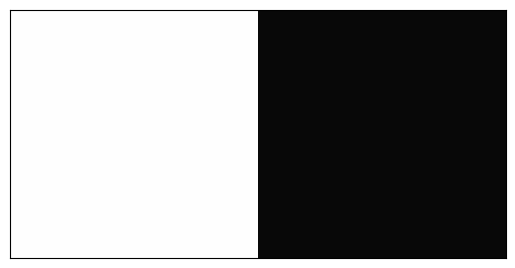

HomeDepot.png


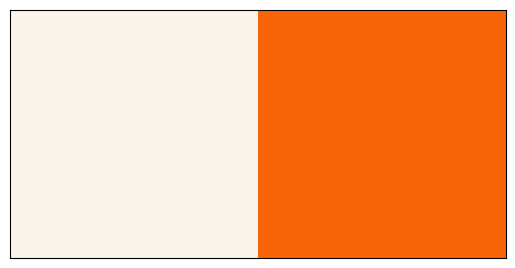

miumiu.png


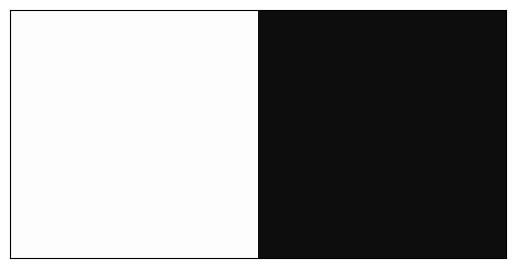

CalvinKlein.png


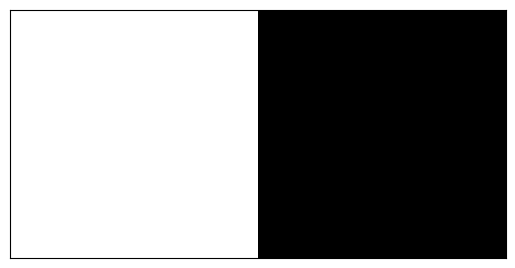

BaskinRobbins.png


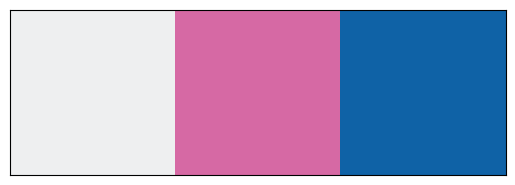

McDonald's 2.png


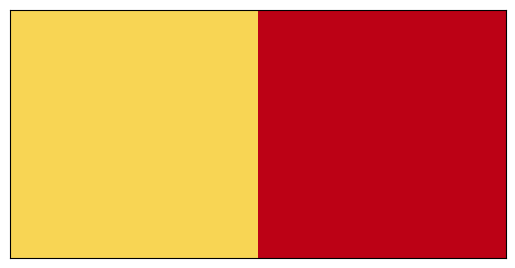

BurgerKing.png


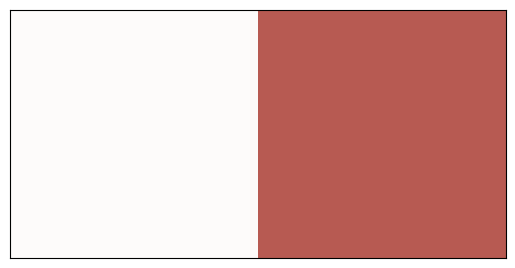

LG.png


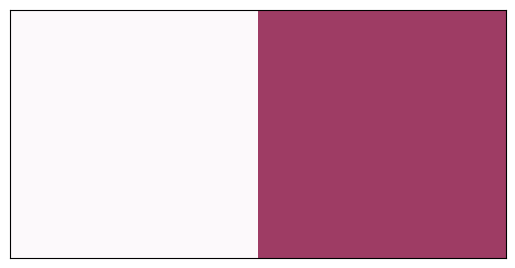

theatre.png


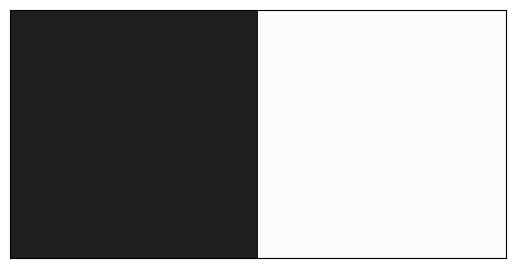

shell.png


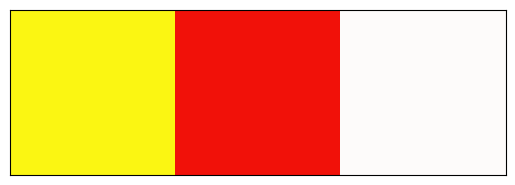

Chanel.png


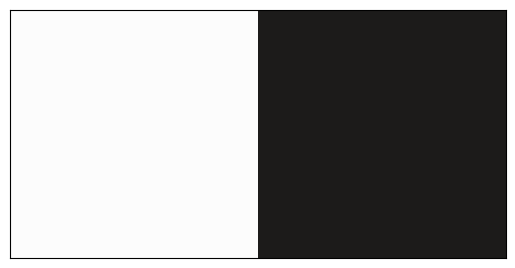

lego.png


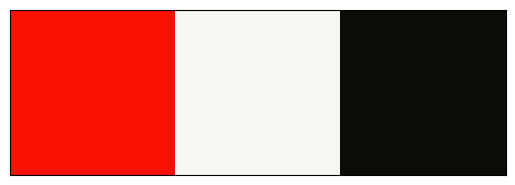

Nike.png


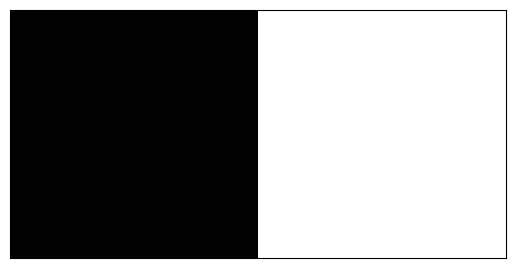

GiorgioArmani.jpeg


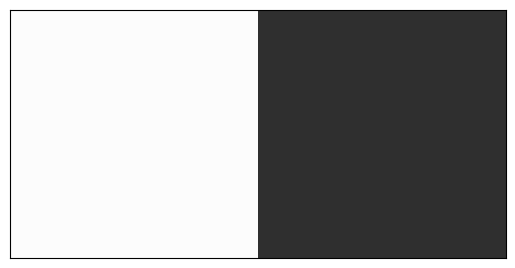

Visa.png


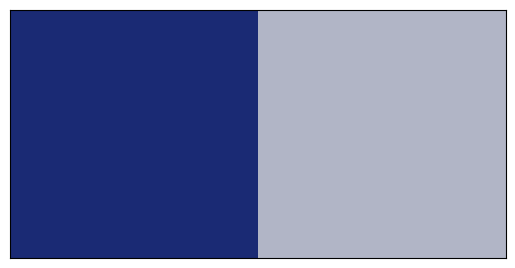

Stussy.png


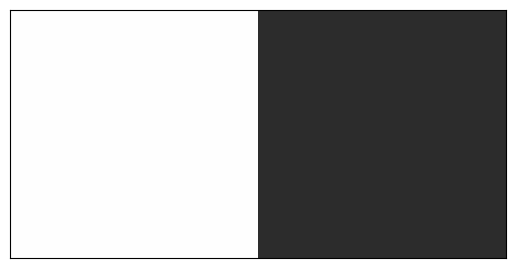

TomFord.jpeg


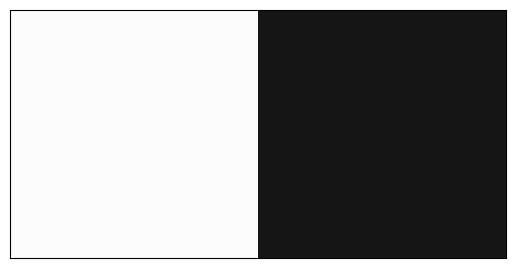

Pepsi.png


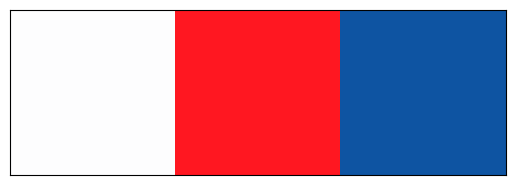

HarleyDavidson.png


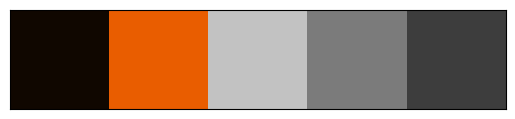

Ikea.png


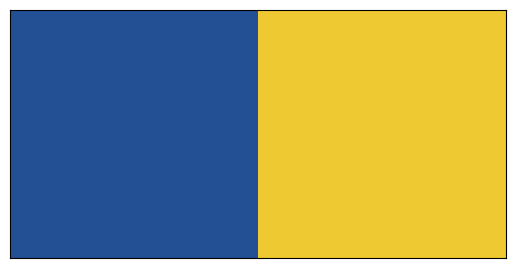

Lowe's.png


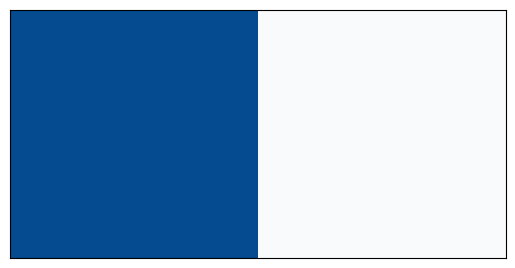

Dior.png


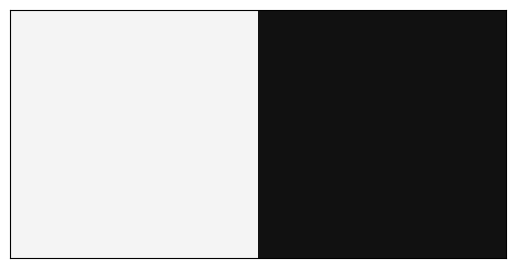

Versace.png


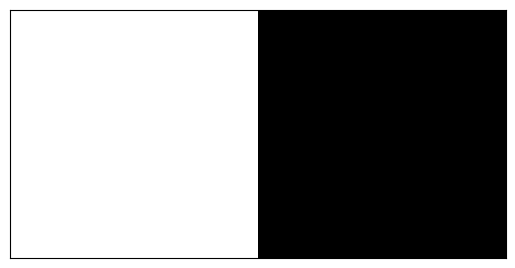

ebay.png


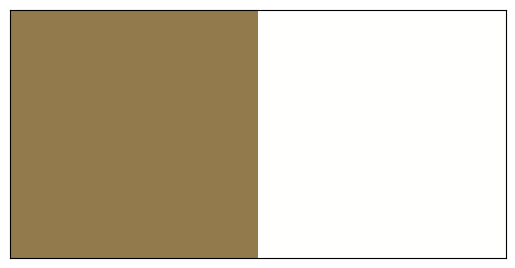

Palace.png


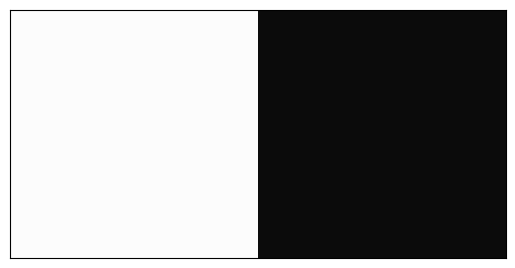

DHL.png


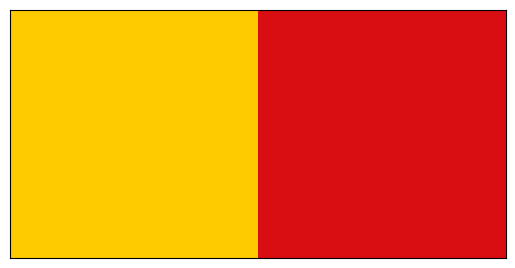

Champion.png


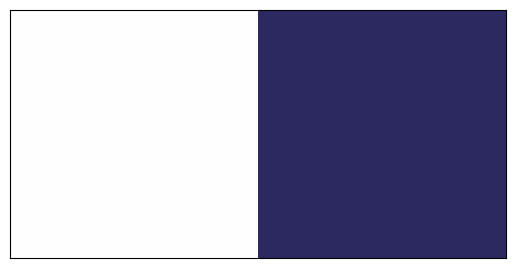

DonnaKaran.png


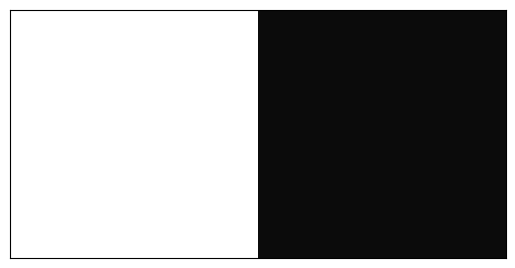

DunkinDonuts.png


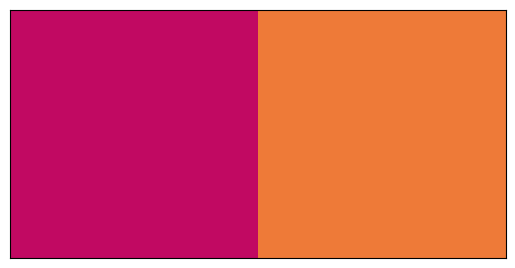

Youtube.png


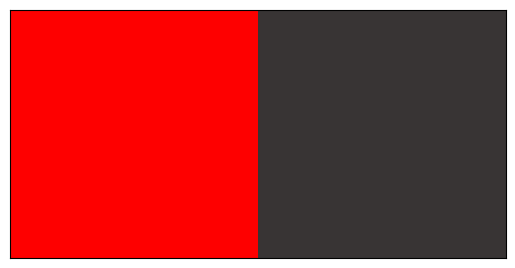

MarcJacobs.png


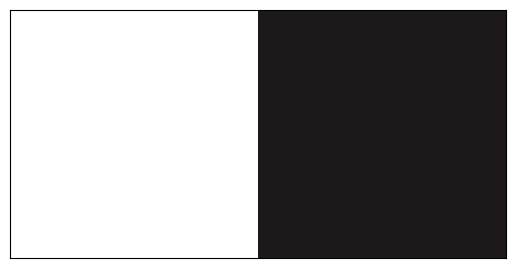

PizzaHut.png


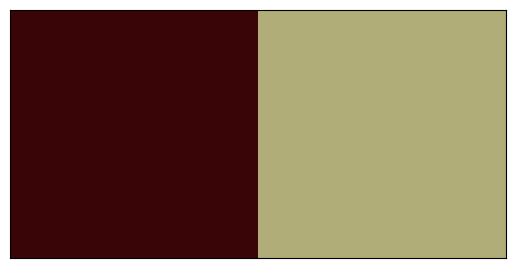

McDonald's.png


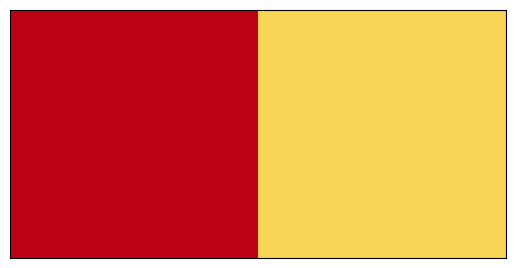

YvesSaintLaurent.png


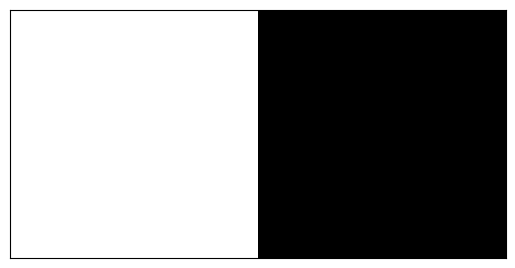

GiorgoArmani DunkinDonuts (fake).png


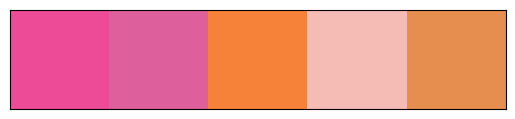

In [62]:
for logo in previous_logos:
    print(logo.name)
    logo.show_colors()

# Time Complexity

- 1-2 seconds to initialize each logo (1.5 on average)
- 1-2 seconds to compare two logos (1.5 on average)
- So runtime of whole program can be calculated using this formula (plug in number of applicants (a) and number of previous (p))

$$\large \text{number of minutes} \approx \frac {(a+p) + (a \cdot p)}{60}$$

## Template matching should be scaled! 
The first DataFrame shows how inaccurate template matching is when a single threshold is set for all pairs. However, when you look at the highest template matching score for each applicant logo, results are significantly better. 

### Top 16 Template Matches (3 actual matches)

In [85]:
df4 = data_dfs['df4']
df4[['Applicant Logo', 'Template Matching', 'Previous Logo']].sort_values('Template Matching', ascending = False).iloc[:16]

,Applicant Logo,Template Matching,Previous Logo
441,mastercard.png,0.566091,Mastercard (reversed).png
477,facebook.png,0.466919,Facebook (reversed).png
491,facebook.png,0.420871,nikon.png
415,espn.png,0.419725,CNN (reversed).png
472,facebook.png,0.414893,HomeDepot (reversed).png
418,espn.png,0.414081,Facebook (reversed).png
409,espn.png,0.414081,HolidayInn (reversed).png
413,espn.png,0.408475,HomeDepot (reversed).png
431,espn.png,0.405530,fedex.png
422,espn.png,0.404455,ESPN (reversed).png


### Highest Template Match for each of 16 applicants (7 actual matches)

In [84]:
prev_template = df4[['Previous Logo', 'Template Matching']]
appl_template = df4[['Applicant Logo', 'Template Matching']]
appl_template.groupby('Applicant Logo').max().reset_index().merge(prev_template)

,Applicant Logo,Template Matching,Previous Logo
0,BaskinRobbins.png,0.343831,CNN (reversed).png
1,cnn.png,0.252814,Mastercard (reversed).png
2,dhl.png,0.313572,DHL (reversed).png
3,dunkin.png,0.256506,Dunkin (reversed).png
4,espn.png,0.419725,CNN (reversed).png
5,facebook.png,0.466919,Facebook (reversed).png
6,fedex.png,0.213830,BaskinRobbins.png
7,ford.png,0.197845,Ford (reversed).png
8,holidayinn.png,0.396468,Facebook (reversed).png
9,homedepot.png,0.230129,HomeDepot (reversed).png


In [47]:
for logo in previous_logos:
    print(logo.name, logo.text)

t-mobile.png 
batman.png 
burgerking.png 
doritos.png 
tommyhilfiger.png TOM ™M Y

HILFIGER

bridgestone.png 
disney.png Disney

microsoft.png 
apple.png 
aldi.png 
caterpillar.png CAT

chiquita.png 
bmw.png 
nbc.png YA

porsche.png 
bridgestone(rotated).png 


In [69]:
applicant_logos[6].colors

{(157, 175, 166): 0.10245028409090909,
 (16, 81, 49): 0.3416193181818182,
 (251, 252, 252): 0.5559303977272727}

In [154]:
logoA = applicant_logos[5]
logoA

BaskinRobbins.png

In [168]:
test

[GiorgoArmani DunkinDonuts (fake).png,
 Visa Versace (fake).png,
 McDonalds (fake).png,
 ebay chloe (fake).png,
 Nike Dior (fake).png,
 McDonalds Stussy (fake).png,
 Nike(jedi).png,
 BaskinRobins DonnaKaran (fake).png,
 Lego(fake).png,
 Nike(fried).png,
 PizzaHut MarcJacobs (fake).png,
 TomFord Youtube (fake).png,
 Nike(woman).png,
 DHL YSL (fake).png,
 Ikea Miumiu (fake).png,
 BurgerKing CalvinKlein (fake).png,
 Pepsi Palace (fake).png,
 LG (fake).png,
 HomeDepot (fake).png,
 tokyo2020 (fake).png,
 Chanel Champion (fake).png,
 Puma Gucci (fake).png,
 Shell(fake).png,
 BaskinRobbins.png]

In [167]:
calculate_logo_shape_complexity_similarity(logoA, test)

,Logo 1,Logo 2,Similarity Score
9,BaskinRobbins.png,Nike(fried).png,1.000000e+00
0,BaskinRobbins.png,GiorgoArmani DunkinDonuts (fake).png,9.934217e-01
17,BaskinRobbins.png,LG (fake).png,9.292078e-01
12,BaskinRobbins.png,Nike(woman).png,8.893117e-01
7,BaskinRobbins.png,BaskinRobins DonnaKaran (fake).png,8.526124e-01
2,BaskinRobbins.png,McDonalds (fake).png,7.960148e-01
16,BaskinRobbins.png,Pepsi Palace (fake).png,7.301788e-01
1,BaskinRobbins.png,Visa Versace (fake).png,6.676095e-01
3,BaskinRobbins.png,ebay chloe (fake).png,6.599102e-01
4,BaskinRobbins.png,Nike Dior (fake).png,6.592395e-01


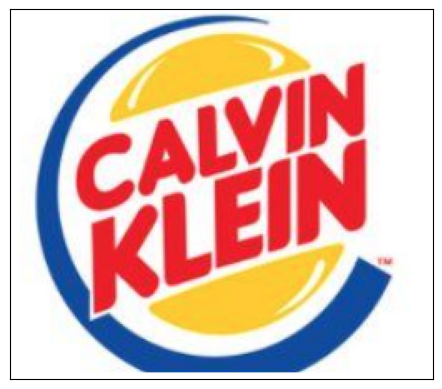

In [86]:
plt.imshow(ck.image, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [84]:
ck = applicant_logos[15]

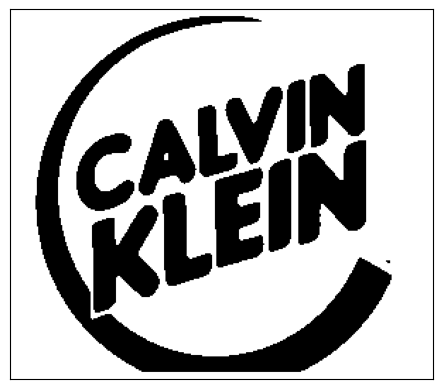

In [89]:
resized = imutils.resize(ck.image, width=300)

# Blurring the image
ck.blurred = cv2.GaussianBlur(resized, (5,5), 0)

# Setting all pixels to white or black
binary_image = ck.image_to_binary()

plt.imshow(binary_image, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()